In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t

In [89]:
data = pd.read_csv("invest.txt", sep=" ", index_col=0)
#print them in a readable form
print(data.head())


         gnp  invest     cpi  interest
year                                  
1968   873.4   133.3   82.54      5.16
1969   944.0   149.3   86.79      5.87
1970   992.7   144.2   91.45      5.95
1971  1077.6   166.4   96.01      4.88
1972  1185.9   195.0  100.00      4.50


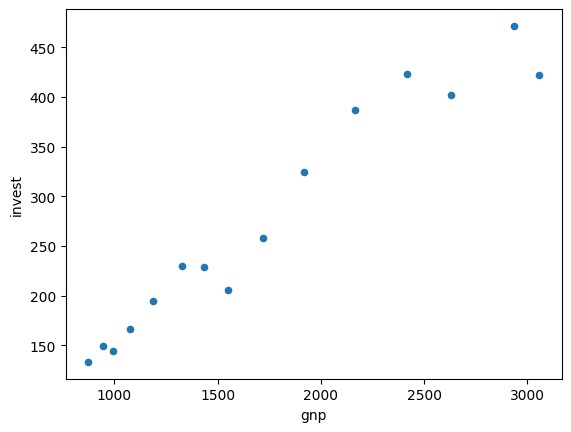

           gnp    invest     cpi  interest
year                                      
1968  2.941213  2.124830   82.54      5.16
1969  2.974972  2.174060   86.79      5.87
1970  2.996818  2.158965   91.45      5.95
1971  3.032458  2.221153   96.01      4.88
1972  3.074048  2.290035  100.00      4.50


<AxesSubplot:xlabel='gnp', ylabel='invest'>

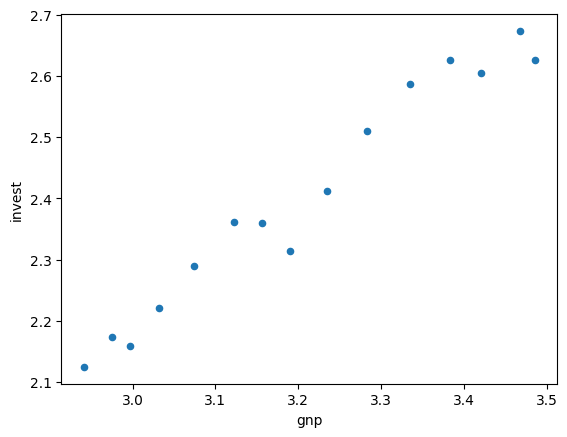

In [125]:
##Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment(column “invest”) being the ordinate.
# data.plot.scatter(x="gnp", y="invest")
# plt.show()
##First, transform the two above mentioned columns, GNP and Investment, via logarithm
data_log = data.copy()


data_log["gnp"] = np.log10(data["gnp"])
data_log["invest"] = np.log10(data["invest"])
print(data_log.head())
##Plot the transformed data again
data.plot.scatter(x="gnp", y="invest")


In [91]:
## Question 3
x_mean= data_log["gnp"].mean()
y_mean= data_log["invest"].mean()
#compute beta 1 and beta 0
beta_1 = sum((data_log["gnp"]-x_mean)*(data_log["invest"]-y_mean))/sum((data_log["gnp"]-x_mean)**2)
beta_0= y_mean - beta_1*x_mean
print("beta_0 is", beta_0)
print("beta_1 is", beta_1)

beta_0 is -0.8527768816035053
beta_1 is 1.0152814015988707


In [92]:
sigma_2 = 1/(len(data)-2) * sum((data_log["invest"]-(beta_0+beta_1*data_log["gnp"]))**2)
#calculate the standard deviation of beta_0 and beta_1
sigma_beta_0 = np.sqrt(sigma_2 * (1/len(data_log) + x_mean**2/sum((data_log["gnp"]-x_mean)**2)))
sigma_beta_1 = np.sqrt(sigma_2/sum((data_log["gnp"]-x_mean)**2))
print("sigma_beta_0 is", sigma_beta_0)
print("sigma_beta_1 is", sigma_beta_1)


sigma_beta_0 is 0.17786412016147274
sigma_beta_1 is 0.055383060354852895


In [93]:
#determination coefficient for the ordinary least squares
R_2 = 1- sum((beta_0+beta_1*data_log["gnp"]-y_mean)**2)/sum((data_log["invest"]-y_mean)**2)
print("R_2 is", R_2)


R_2 is 0.037242704394216175


In [94]:
#Question 4 student t-test for beta_1
#compute quantile of the t-distribution

p_value= 2*t.cdf(-abs(beta_1/sigma_beta_1), df=len(data_log)-2)
#compute t-value
t_value = beta_1/sigma_beta_1
print("p_value is", p_value)
print("t_value is", t_value)
print("la p_value est très petite, donc on rejette l'hypothèse nulle, beta_1 est significativement différent de 0")


p_value is 1.1363715333557148e-10
t_value is 18.331984456866646
la p_value est très petite, donc on rejette l'hypothèse nulle, beta_1 est significativement différent de 0


In [128]:
## Question 5
##For the GNP value 1000, estimate the necessary Investment, provide confidence and predictionintervals for the 90% level.

gnp_value = np.log10(1000)
alpha_level= 0.1

t_V= t.ppf(1-alpha_level/2, df=len(data_log)-2)
print(t_V)

#necessary investment
invest_value = beta_0 +beta_1*gnp_value
print("necessary investment is", invest_value)

deviation = (gnp_value-x_mean)**2/sum((data_log["gnp"]-x_mean)**2)
std= np.sqrt(sigma_2)
#confidence interval
CI_0 = invest_value - t_V*std*np.sqrt((1/len(data_log)+ deviation))
CI_1 = invest_value + t_V*std*np.sqrt((1/len(data_log)+ deviation))

print("confidence interval is", CI_0, CI_1)

#prediction interval
PI_1 = invest_value + t_V*std*np.sqrt((1+1/len(data_log)+ deviation))
PI_0 = invest_value - t_V*std*np.sqrt((1+1/len(data_log)+ deviation))
print("prediction interval is", PI_0, PI_1)

def confidence(x):
    invest_value = beta_0 +beta_1*x
    deviation = (gnp_value-x_mean)**2/sum((data_log["gnp"]-x_mean)**2)
    CI_0 = invest_value - t_V*std*np.sqrt((1/len(data_log)+ deviation))
    CI_1 = invest_value + t_V*std*np.sqrt((1/len(data_log)+ deviation))
    return CI_0, CI_1

def prediction(x):
    invest_value = beta_0 +beta_1*x
    deviation = (gnp_value-x_mean)**2/sum((data_log["gnp"]-x_mean)**2)
    PI_1 = invest_value + t_V*std*np.sqrt((1+1/len(data_log)+ deviation))
    PI_0 = invest_value - t_V*std*np.sqrt((1+1/len(data_log)+ deviation))
    return PI_0, PI_1


    

1.7709333959867988
necessary investment is 2.193067323193107
confidence interval is 2.1663576565089886 2.2197769898772255
prediction interval is 2.1205817923061265 2.2655528540800876


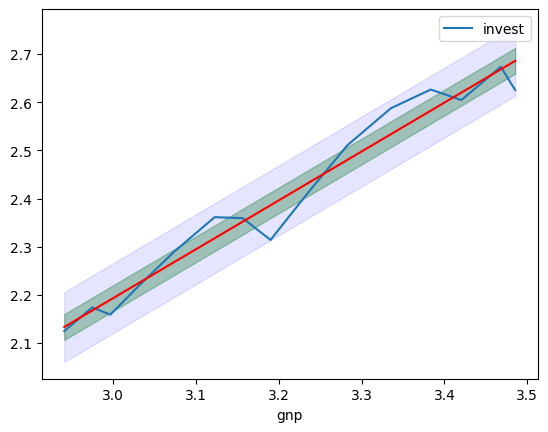

In [141]:
## Question 6
## On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the estimated regression line, the confidence and prediction intervals 
## for all values of log(GNP) between its minimum and maximum in the data set.


x = np.linspace(data_log["gnp"].min(), data_log["gnp"].max(), 100)
y = beta_0 + beta_1*x
#plot the data
fig,ax = plt.subplots()
data_log.plot(x="gnp", y="invest", ax=ax)

#plot the regression line
plt.plot(x, y, color="red")
#plot the confidence intervals
ax.fill_between(x, confidence(x)[0], confidence(x)[1],color="green", alpha=0.3)
ax.fill_between(x, prediction(x)[0], prediction(x)[1],color="blue", alpha=0.1)
plt.show()


In [162]:
## Question 7
#Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality.
import sklearn.linear_model as lm
X= data_log["gnp"].values.reshape(-1,1)
Y= data_log["invest"].values.reshape(-1,1)
reg = lm.LinearRegression()
reg.fit(X,Y)
print("intercept is", reg.intercept_)
print("slope is", reg.coef_)
print("determination coefficient is", reg.score(X,Y))
print(beta_0, beta_1, 1-R_2)

#predict the necessary investment
y_pred=reg.predict(X)


intercept is [-0.85277688]
slope is [[1.0152814]]
determination coefficient is 0.9627572956057853
-0.8527768816035053 1.0152814015988707 0.9627572956057838


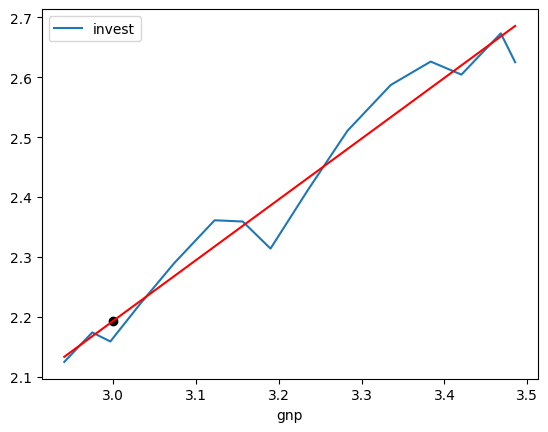

In [163]:
## Question 8
#On a plot with logarithmic axes, plot the data, the regression line and the predicted point. The graphic should coincide with the corresponding elements from the one in Step 6
fig,ax = plt.subplots()
data_log.plot(x="gnp", y="invest", ax=ax)
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.scatter(gnp_value, invest_value, color="black")
plt.show()


In [173]:
## Question 9
# For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix. Is it of full rank ?
data_f = data[['gnp', 'interest', 'invest']]
data_f = data_f.to_numpy()
print(data_f)
Gram = np.dot(data_f.T, data_f)
print(Gram)
if(np.linalg.matrix_rank(Gram)==3):
    print("Gram matrix is of full rank")



[[ 873.4     5.16  133.3 ]
 [ 944.      5.87  149.3 ]
 [ 992.7     5.95  144.2 ]
 [1077.6     4.88  166.4 ]
 [1185.9     4.5   195.  ]
 [1326.4     6.44  229.8 ]
 [1434.2     7.83  228.7 ]
 [1549.2     6.25  206.1 ]
 [1718.      5.5   257.9 ]
 [1918.3     5.46  324.1 ]
 [2163.9     7.46  386.6 ]
 [2417.8    10.28  423.  ]
 [2633.1    11.77  402.3 ]
 [2937.7    13.42  471.5 ]
 [3057.5    11.02  421.9 ]]
[[5.34945068e+07 2.21033896e+05 8.42163958e+06]
 [2.21033896e+05 9.43855700e+02 3.48029500e+04]
 [8.42163958e+06 3.48029500e+04 1.33625485e+06]]
Gram matrix is of full rank
